# Seattle Wheather

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [131]:
df = pd.read_csv('seattle-weather.csv')

In [132]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [134]:
df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [135]:
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [136]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


C:\Users\csm_h\AppData\Local\Temp\ipykernel_17396\4118319972.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weather', data=df, palette='viridis')


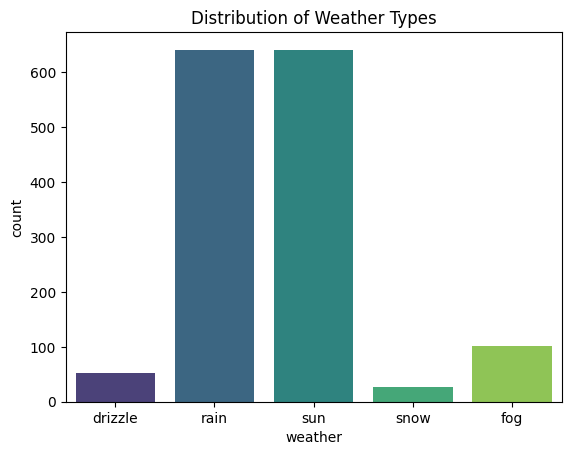

In [137]:
# Count plot of weather types
sns.countplot(x='weather', data=df, palette='viridis')
plt.title("Distribution of Weather Types")
plt.show()

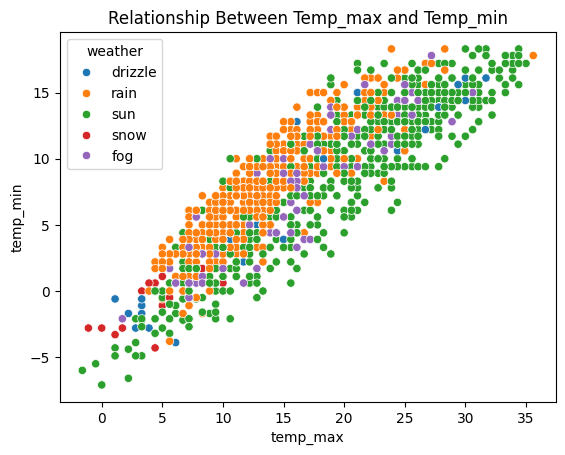

In [138]:
# Visualize the relationship between temp_max and temp_min
sns.scatterplot(x='temp_max', y='temp_min', hue='weather', data=df)
plt.title("Relationship Between Temp_max and Temp_min")
plt.show()

Data Preprocessing

In [139]:
df_cleaned = df.drop(columns=['date'])
weather_mapping = {'drizzle': 0, 'rain': 1, 'sun': 2, 'snow': 3, 'fog': 4}
df_cleaned['weather_encoded'] = df_cleaned['weather'].map(weather_mapping)

In [142]:
# Split features and target
X = df_cleaned.drop(columns=['weather', 'weather_encoded'])
y = df_cleaned['weather_encoded']

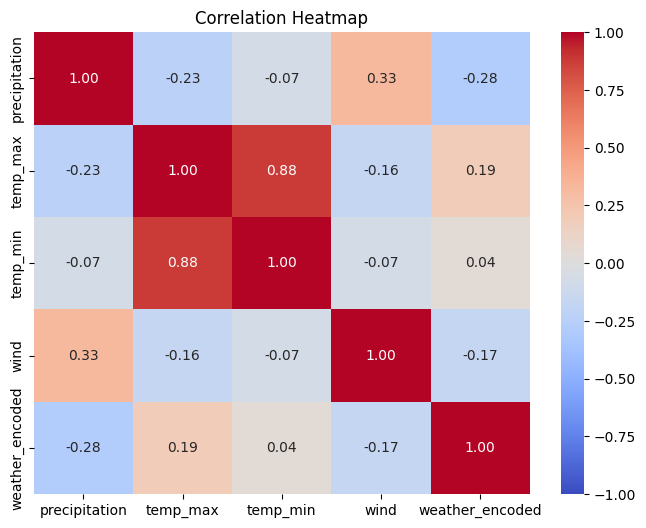

In [143]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pd.concat([X, y], axis=1).corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
pd.concat([X, y], axis=1).corr()
plt.title("Correlation Heatmap")
plt.show()

In [144]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [146]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Naive Bayes Classification

In [158]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

In [172]:
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_test, nb_pred))

Naive Bayes Accuracy: 0.8294

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.96      0.91      0.94       120
           2       0.76      0.99      0.86       131
           3       0.57      0.50      0.53         8
           4       0.00      0.00      0.00        25

    accuracy                           0.83       293
   macro avg       0.46      0.48      0.47       293
weighted avg       0.75      0.83      0.78       293



c:\Users\csm_h\OneDrive\Masaüstü\GelecekHayalim-VeriBilimi\Week-5\datasets\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\csm_h\OneDrive\Masaüstü\GelecekHayalim-VeriBilimi\Week-5\datasets\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\csm_h\OneDrive\Masaüstü\GelecekHayalim-VeriBilimi\Week-5\datasets\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

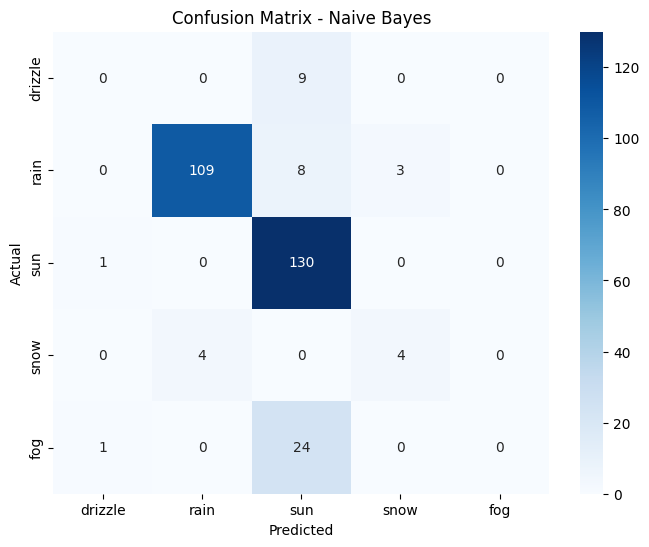

In [183]:
# Naive Bayes Confusion Matrix
plt.figure(figsize=(8, 6))
nb_conf_matrix = confusion_matrix(y_test, nb_pred)
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=weather_mapping.keys(),
            yticklabels=weather_mapping.keys())
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Decision Trees Classification

In [97]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [173]:
# Decision Tree Results
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_test, dt_pred))

Decision Tree Accuracy: 0.8328

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.96      0.92      0.94       120
           2       0.76      1.00      0.86       131
           3       0.60      0.38      0.46         8
           4       0.00      0.00      0.00        25

    accuracy                           0.83       293
   macro avg       0.46      0.46      0.45       293
weighted avg       0.75      0.83      0.78       293



c:\Users\csm_h\OneDrive\Masaüstü\GelecekHayalim-VeriBilimi\Week-5\datasets\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\csm_h\OneDrive\Masaüstü\GelecekHayalim-VeriBilimi\Week-5\datasets\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\csm_h\OneDrive\Masaüstü\GelecekHayalim-VeriBilimi\Week-5\datasets\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

In [176]:
conf_matrix = confusion_matrix(y_test, dt_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[  0   0   9   0   0]
 [  0 110   8   2   0]
 [  0   0 131   0   0]
 [  0   5   0   3   0]
 [  0   0  25   0   0]]


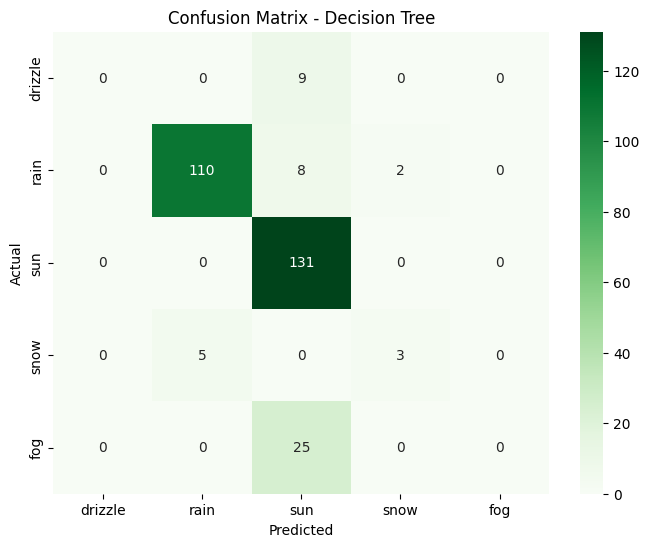

In [185]:
# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
dt_conf_matrix = confusion_matrix(y_test, dt_pred)
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=weather_mapping.keys(),
            yticklabels=weather_mapping.keys())
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

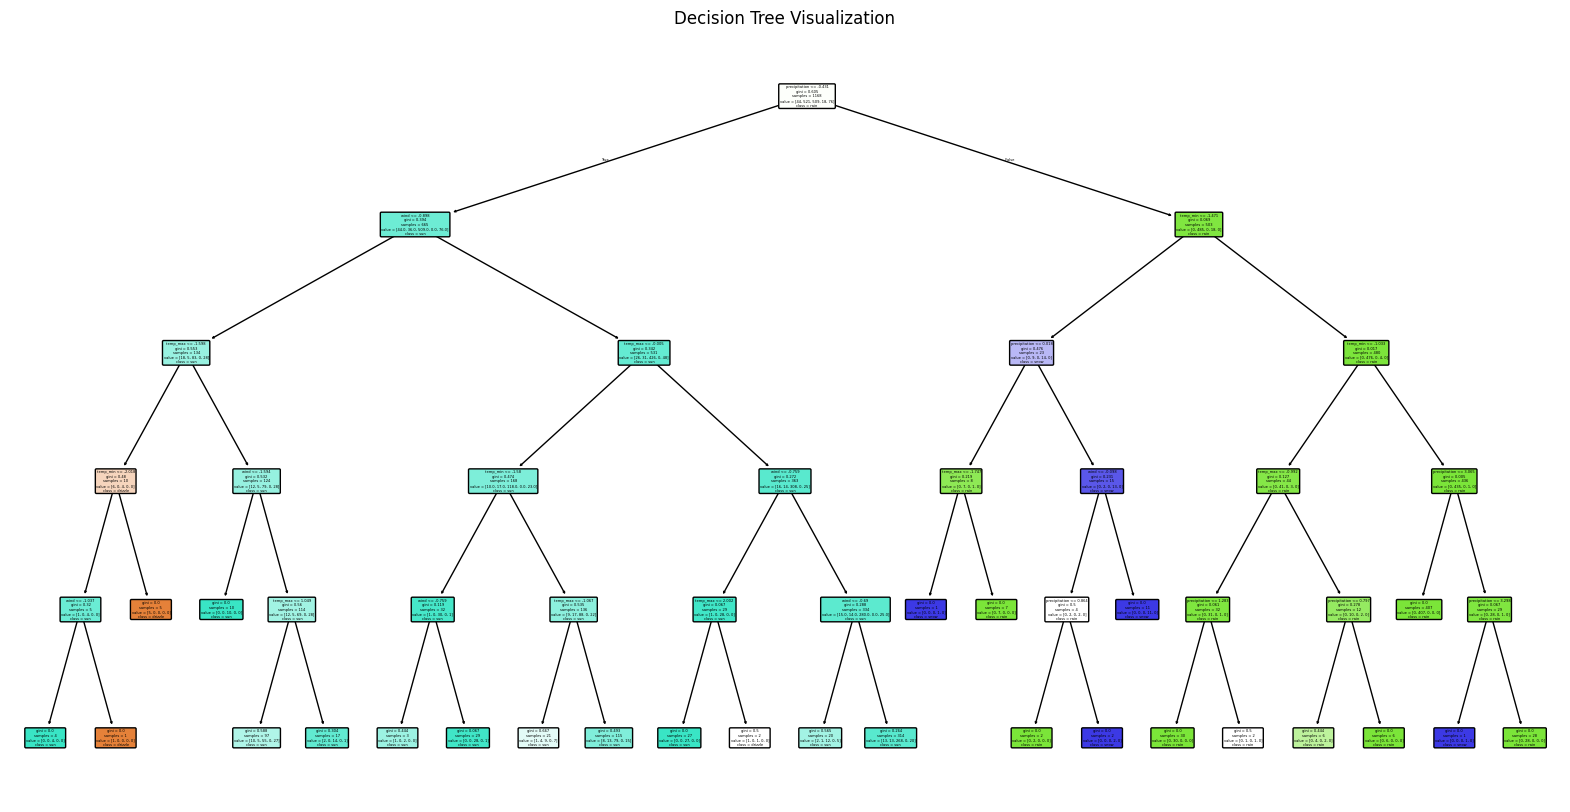

In [184]:
# Decision Tree Visualization
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, 
          class_names=list(weather_mapping.keys()), 
          filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

C:\Users\csm_h\AppData\Local\Temp\ipykernel_17396\933112872.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=dt_importance, palette='viridis')


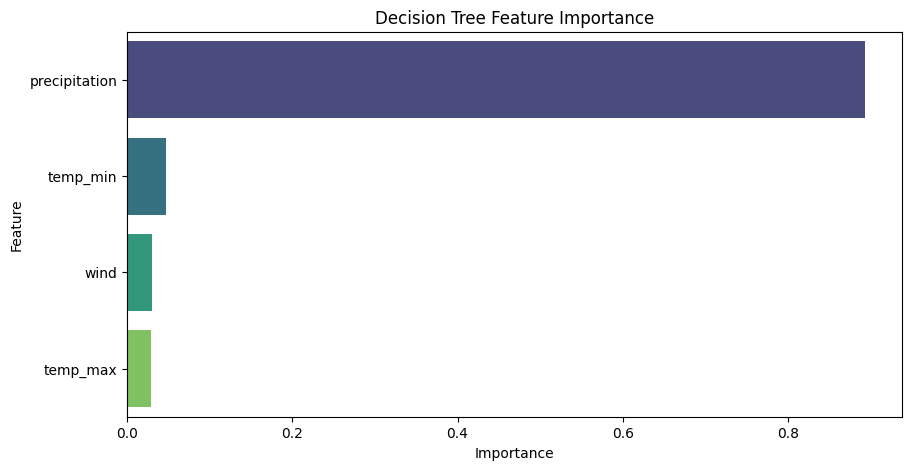

In [187]:
# Decision Tree Feature Importance
plt.figure(figsize=(10, 5))
dt_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=dt_importance, palette='viridis')
plt.title("Decision Tree Feature Importance")
plt.show()

## Random Forest Classification

In [171]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [188]:
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.8191

Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.11      0.14         9
           1       0.93      0.92      0.92       120
           2       0.78      0.95      0.86       131
           3       0.40      0.25      0.31         8
           4       0.50      0.12      0.19        25

    accuracy                           0.82       293
   macro avg       0.56      0.47      0.48       293
weighted avg       0.79      0.82      0.79       293



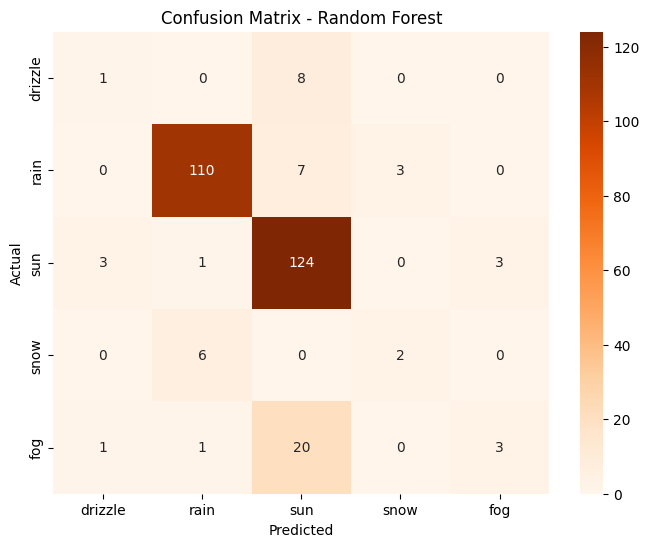

In [191]:
# Random Forest Confusion Matrix
plt.figure(figsize=(8, 6))
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Oranges',
            xticklabels=weather_mapping.keys(),
            yticklabels=weather_mapping.keys())
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

C:\Users\csm_h\AppData\Local\Temp\ipykernel_17396\2255354166.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_importance, palette='viridis')


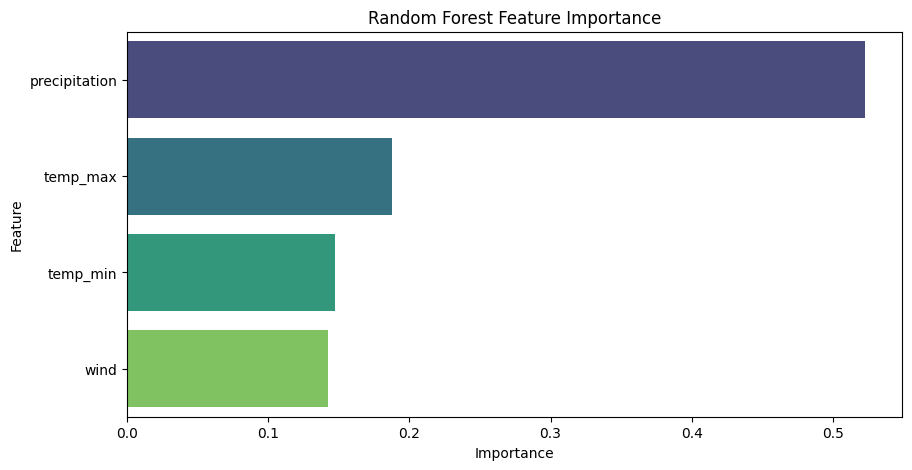

In [190]:
# Random Forest Feature Importance
plt.figure(figsize=(10, 5))
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=rf_importance, palette='viridis')
plt.title("Random Forest Feature Importance")
plt.show()

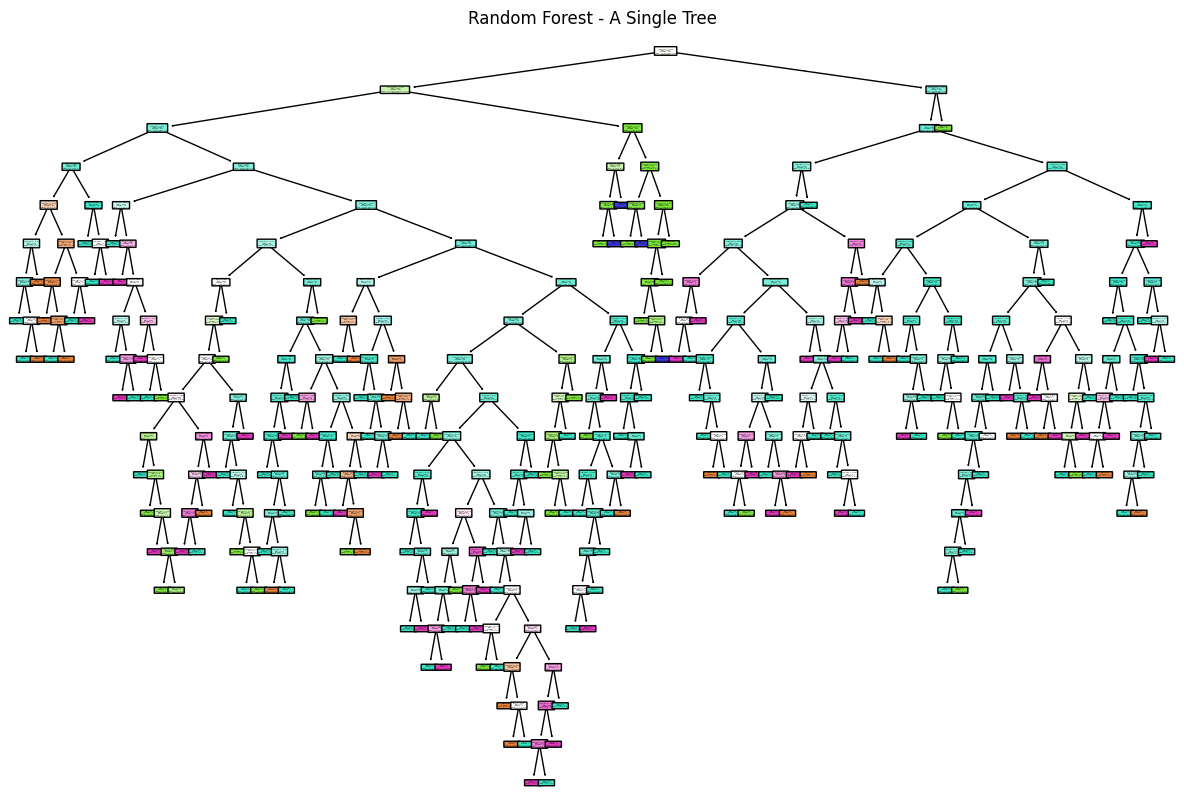

In [180]:
# Visualize a single tree from the Random Forest
plt.figure(figsize=(15, 10))
plot_tree(rf_model.estimators_[0], feature_names=X3.columns, class_names=[str(i) for i in weather_mapping.keys()], filled=True, rounded=True)
plt.title("Random Forest - A Single Tree")
plt.show()

## Model Comparison

In [195]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Test Accuracy': [nb_accuracy, dt_accuracy, rf_accuracy],
    'CV Mean Accuracy': [nb_cv_scores.mean(), dt_cv_scores.mean(), rf_cv_scores.mean()],
    'CV Std': [nb_cv_scores.std(), dt_cv_scores.std(), rf_cv_scores.std()]
}).reset_index(drop=True)

In [196]:
print("\nModel Performance Comparison:")
comparison_df


Model Performance Comparison:


,Model,Test Accuracy,CV Mean Accuracy,CV Std
0,Naive Bayes,0.829352,0.842632,0.046654
1,Decision Tree,0.832765,0.838515,0.044208
2,Random Forest,0.819113,0.830988,0.046826


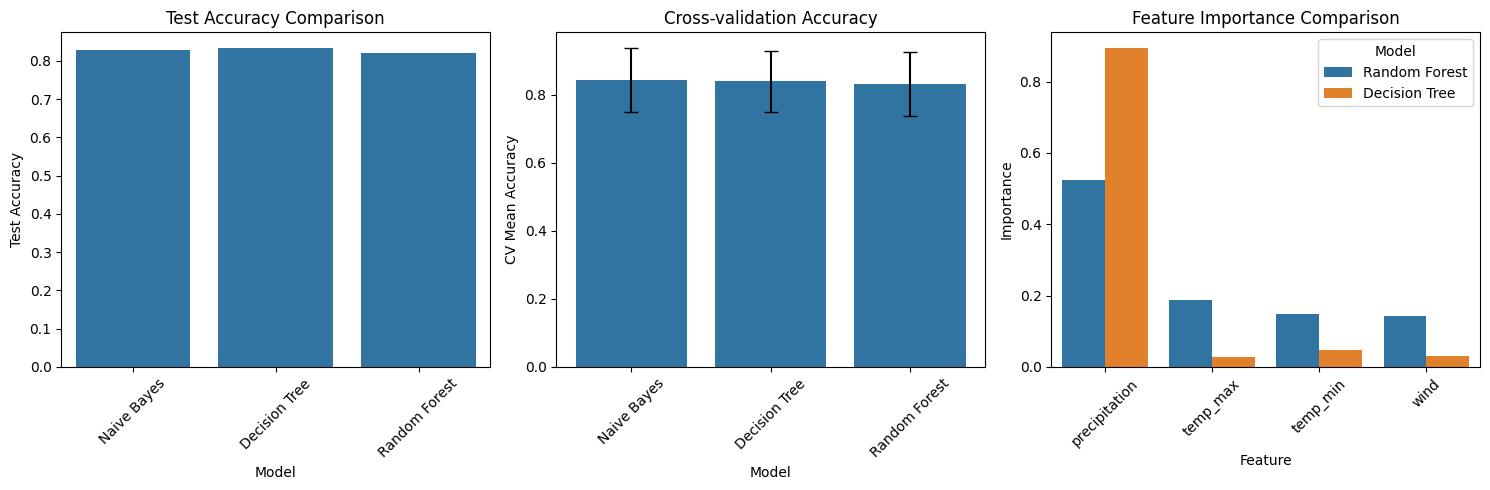

In [197]:
# Final Comparison Visualizations
plt.figure(figsize=(15, 5))

# Test Accuracy Comparison
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='Test Accuracy', data=comparison_df)
plt.title('Test Accuracy Comparison')
plt.xticks(rotation=45)

# Cross-validation Comparison
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='CV Mean Accuracy', data=comparison_df)
plt.errorbar(x=range(len(comparison_df)), 
            y=comparison_df['CV Mean Accuracy'],
            yerr=comparison_df['CV Std']*2,
            fmt='none', color='black', capsize=5)
plt.title('Cross-validation Accuracy')
plt.xticks(rotation=45)

# Feature Importance Comparison
plt.subplot(1, 3, 3)
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Random Forest': rf_model.feature_importances_,
    'Decision Tree': dt_model.feature_importances_
})
feature_importance_df = feature_importance_df.melt(
    id_vars=['Feature'], 
    var_name='Model',
    value_name='Importance'
)
sns.barplot(x='Feature', y='Importance', hue='Model', data=feature_importance_df)
plt.title('Feature Importance Comparison')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()